In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [2]:
pstable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/pstable.csv")

In [3]:
pstable

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Twister (1996),MacArthur (1977),Look Who's Talking (1989),PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,NaN,NaN,1.000,NaN,0.750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,NaN,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,NaN,NaN,0.500,NaN,0.750,NaN,NaN,NaN,NaN,1.000,...,NaN,NaN,NaN,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,NaN,NaN,0.875,NaN,0.125,NaN,0.125,0.250,NaN,0.000,...,0.375,NaN,NaN,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,0.75,1.0,NaN,NaN,1.000,1.0,0.625,NaN,0.875,0.875,...,1.000,1.0,1.0,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,...,NaN,NaN,NaN,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


In [4]:
# extract data from columns related to personality traits
ps=pstable.iloc[:,400:407]

In [5]:
ps

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...
1092,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


In [6]:
# check for missing values
ps.isnull().sum()

PSPC1    0
PSPC2    0
PSPC3    0
PSPC4    0
PSPC5    0
PSPC6    0
PSPC7    0
dtype: int64

In [7]:
# draw a heat map for correlation among variables
ps.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/beckybian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
PSPC1,1.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
PSPC2,-0.00,1.00,0.00,0.00,0.00,-0.00,0.00
PSPC3,-0.00,0.00,1.00,0.00,-0.00,-0.00,0.00
PSPC4,-0.00,0.00,0.00,1.00,-0.00,-0.00,0.00
PSPC5,0.00,0.00,-0.00,-0.00,1.00,-0.00,-0.00
PSPC6,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00
PSPC7,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00


In [8]:
'''Clustering - doing quantitatively what can be seen intuitively

Clustering answers - in a data-driven way - which subgroup a datapoint belongs to.
The "kMeans clustering" is like pca of clustering. It's not the only clustering 
method, but it is the most commonly used one.

Algorithm: Minimize the summed distances between a cluster center and its
members. Once the minimum has been found (regardless of starting
position), it stops. "Converging".

Store our transformed data - the predictors - as x:
'''
x=ps

In [9]:
x

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...
1092,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


# we need to determine number of clusters first!!!

In [10]:
# 0. Init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

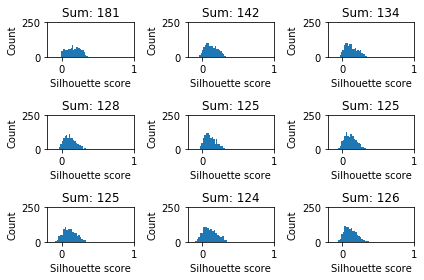

In [11]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:   
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

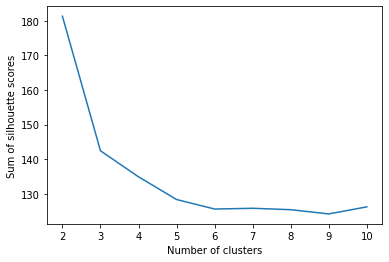

In [12]:
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

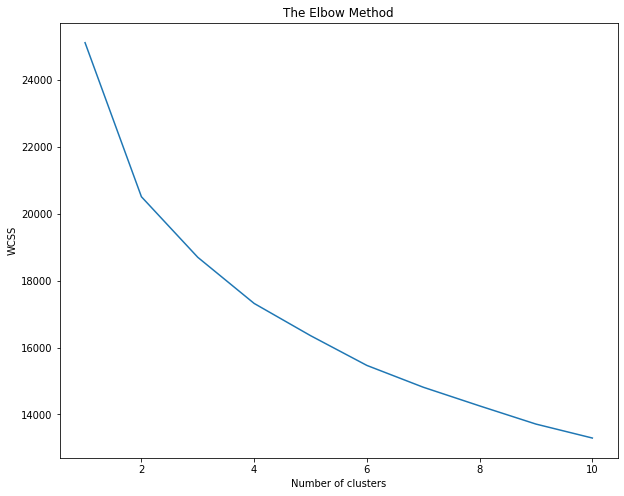

In [13]:
# Elbow method
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

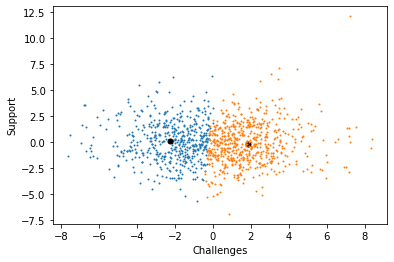

In [17]:
# Now let's recompute the kMeans using 4 clusters and plot the color-coded data

# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x.values[plotIndex,0],x.values[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Challenges')
    plt.ylabel('Support')
    
# As you can see, kMeans returns as many clusters as you ask for. 
# What it does is returns the optimal center that minimizes the summed
# distance from all centers. But it requires - as an input (!) - how many
# clusters to look for. Basically, you find what you look for in terms of
# cluster number. And the sum of the summed distances is only going down

# Solution: "Silhouette"
# Silhouette takes distances nearest neighbor clusters into account

In [18]:
x.values

array([[ 2.20891255,  0.29706054, -1.82841723, ...,  5.36710815,
        -1.41909003,  2.53835724],
       [ 2.01137445,  1.05127155, -2.45060564, ...,  1.41210194,
        -1.40202218,  1.77728204],
       [ 0.21379001,  0.17716176,  0.47680636, ..., -1.31955013,
         0.16501019,  0.36698468],
       ...,
       [-2.1926958 , -1.51913884, -3.07418294, ..., -1.38287876,
         0.66887666,  1.27423594],
       [-0.93914289, -3.56118327, -0.97890064, ...,  0.20291727,
        -1.5589466 ,  0.25564606],
       [-5.02625628, -1.25016465,  0.83184406, ...,  0.72627933,
         0.32788432,  1.18169645]])

In [19]:
cId

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [20]:
# Run the DBSCAN and plot the color-coded data

# Format data:
#x = np.column_stack((data[:,0],data[:,1]))

# Fit model to our data:
dbscanModel = DBSCAN().fit(x) # Default eps = 0.5, min_samples = 5

# Get our labels for each data point:
labels = dbscanModel.labels_

# Plot the color-coded data:
numSpirals = 2
for ii in range(numSpirals):
    labelIndex = np.argwhere(labels==ii)
    plt.plot(newps.values[labelIndex,0],newps.values[labelIndex,1],'o',markersize=1)

NameError: name 'newps' is not defined

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
ps['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(ps.groupby('cluster').mean(),1))
kmeans_mean_cluster




/Users/beckybian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
cluster,,,,,,,
1,-2.3,0.2,0.1,-0.0,-0.1,0.0,-0.0
2,1.8,-0.1,-0.0,0.0,0.1,-0.0,0.0


In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
ps['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(ps.groupby('cluster').mean())
kmeans_mean_cluster



/Users/beckybian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
cluster,,,,,,,
1,-2.262513,0.150805,0.052809,-0.035932,-0.104362,0.036850,-0.016400
2,1.839928,-0.122638,-0.042946,0.029221,0.084869,-0.029967,0.013337


In [23]:
# separte observations in each cluster into two separate tables
cluster_1=ps[ps['cluster']==1]
cluster_2=ps[ps['cluster']==2]

In [24]:
cluster_1

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,cluster
3,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446,1
9,-2.825191,0.726470,1.420172,0.605404,2.192692,-1.077891,0.947104,1
10,-0.838897,-5.613446,-2.923769,0.302890,-1.670042,0.565754,-0.297171,1
13,-2.314588,0.670797,-1.701732,1.435315,3.473108,-0.745093,0.492967,1
15,-0.367950,0.152357,0.700485,0.830775,-0.289545,-0.049489,0.460172,1
...,...,...,...,...,...,...,...,...
1088,-1.350331,1.303967,-1.547527,-0.178641,-2.262249,-0.346197,-0.369748,1
1093,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476,1
1094,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236,1
1095,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646,1


In [25]:
# create a table to illustrate feature mean, median and mode in each cluster
cluster1_char=pd.DataFrame(index=["Mean","Median","Mode"],columns=cluster_1.columns)
for i in range(7):
    cluster1_char.iloc[0,i]=np.mean(cluster_1.iloc[:,i])
    cluster1_char.iloc[1,i]=np.median(cluster_1.iloc[:,i])
    cluster1_char.iloc[2,i]=cluster_1.iloc[:,i].mode()[0]





    

In [26]:
cluster1_char

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,cluster
Mean,-2.262513,0.150805,0.052809,-0.035932,-0.104362,0.03685,-0.0164,NaN
Median,-1.964861,0.101873,0.135407,-0.025438,-0.119016,0.04781,0.018271,NaN
Mode,-7.643644,-5.613446,-5.600659,-5.274997,-4.481141,-5.876159,-3.624851,NaN


In [27]:
cluster2_char=pd.DataFrame(index=["Mean","Median","Mode"],columns=cluster_2.columns)
for i in range(7):
    cluster2_char.iloc[0,i]=np.mean(cluster_2.iloc[:,i])
    cluster2_char.iloc[1,i]=np.median(cluster_2.iloc[:,i])
    cluster2_char.iloc[2,i]=float(cluster_2.iloc[:,i].mode())

In [28]:
cluster2_char

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,cluster
Mean,1.839928,-0.122638,-0.042946,0.029221,0.084869,-0.029967,0.013337,NaN
Median,1.53563,-0.173613,-0.079556,0.098074,0.13345,-0.07282,0.047946,NaN
Mode,-0.159659,-0.834509,-0.108976,0.098074,-0.370792,-1.121036,0.343422,NaN


In [33]:
cluster_2

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,cluster
0,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357,2
1,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282,2
2,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985,2
4,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654,2
5,6.612358,0.270231,-1.556534,1.558881,0.847418,1.594202,2.096101,2
...,...,...,...,...,...,...,...,...
1087,0.139128,0.689025,-0.028569,-2.901998,1.962997,0.806853,-0.187584,2
1089,5.633507,-2.613429,-1.365406,-2.203311,1.762087,0.748481,-3.229906,2
1090,8.324285,-0.561847,0.925657,0.236119,0.165378,-1.052696,-0.032322,2
1091,3.806811,0.928934,-4.085268,-2.221486,-2.290940,-0.829032,0.580011,2


In [34]:
ps.iloc[:,:-1]

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...
1092,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


In [35]:
# try to use PCA and plot the clusters in 2d
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(ps.iloc[:,:-1])
reduced = pca.transform(ps.iloc[:,:-1])


In [36]:
reduced=pd.DataFrame(reduced,columns=["PC1","PC2"])

In [37]:
reduced

,PC1,PC2
0,2.208912,0.297084
1,2.011374,1.051288
2,0.213790,0.177166
3,-1.701968,-2.852020
4,2.206418,-0.128511
...,...,...
1092,0.187946,-1.616933
1093,-1.749835,-2.650045
1094,-2.192696,-1.519136
1095,-0.939143,-3.561176


In [38]:
newps=pd.concat([reduced,ps.iloc[:,-1]],axis=1)

In [39]:
newps

,PC1,PC2,cluster
0,2.208912,0.297084,2
1,2.011374,1.051288,2
2,0.213790,0.177166,2
3,-1.701968,-2.852020,1
4,2.206418,-0.128511,2
...,...,...,...
1092,0.187946,-1.616933,2
1093,-1.749835,-2.650045,1
1094,-2.192696,-1.519136,1
1095,-0.939143,-3.561176,1


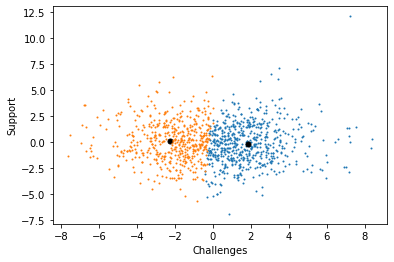

In [40]:
# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(newps.values[plotIndex,0],newps.values[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Challenges')
    plt.ylabel('Support')

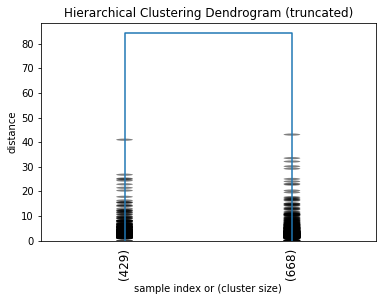

In [41]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
x2 = x
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(x2,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

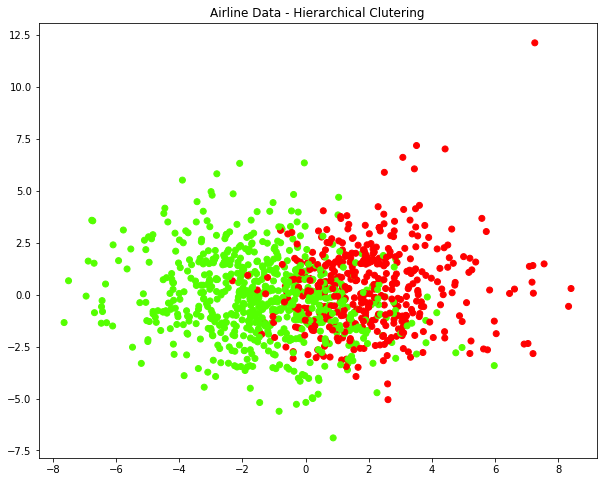

In [42]:

# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=2
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(x2.iloc[:,0], x2.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Airline Data - Hierarchical Clutering')
plt.show()



In [43]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset2=ps
dataset2['cluster'] = cluster_Hierarchical
dataset2.head()



/Users/beckybian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,cluster
0,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357,1
1,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282,1
2,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985,2
3,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446,2
4,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654,1


In [44]:
kmeans_mean_cluster = pd.DataFrame(round(dataset2.groupby('cluster').mean(),1))



In [45]:
kmeans_mean_cluster

,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
cluster,,,,,,,
1,2.0,0.3,-0.7,-0.2,0.1,0.1,0.0
2,-1.3,-0.2,0.5,0.2,-0.1,-0.1,-0.0
